In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [3]:
TESS = "/home/nikhil/Desktop/audio/dataset/tess/TESS Toronto emotional speech set data/"
RAV = "/home/nikhil/Desktop/audio/dataset/RAVDESS/"
SAVEE = "/home/nikhil/Desktop/audio/dataset/savee/ALL/"
CREMA = "/home/nikhil/Desktop/audio/dataset/CREMAD/AudioWAV/"


dir_list = os.listdir(SAVEE)
dir_list[0:5]
len(dir_list)

480

In [4]:
dir_list=os.listdir(SAVEE)
emotion=[]
path=[]
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
SAVEE_df=pd.DataFrame(emotion,columns=['labels'])
SAVEE_df['source']='SAVEE'
SAVEE_df=pd.concat([SAVEE_df,pd.DataFrame(path,columns=['path'])],axis=1)

In [5]:
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

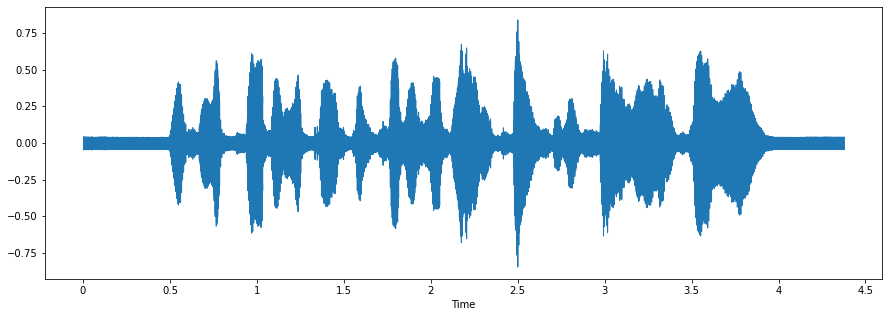

In [6]:
fname = SAVEE + 'DC_f12.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)


ipd.Audio(fname)

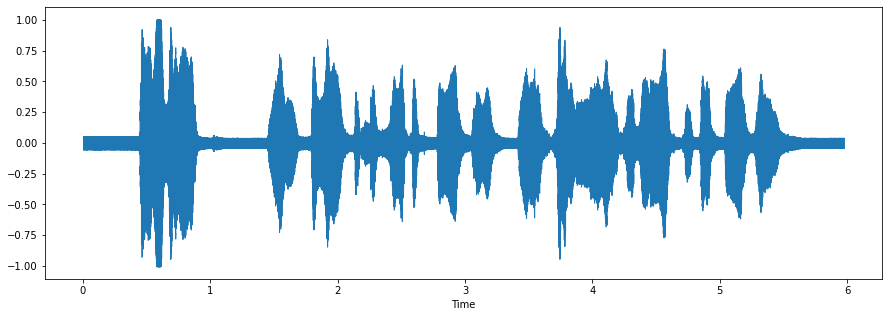

In [7]:
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)


ipd.Audio(fname)

In [8]:
dir_list = os.listdir(RAV)
dir_list.sort()

In [9]:
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [10]:


emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: labels, dtype: int64

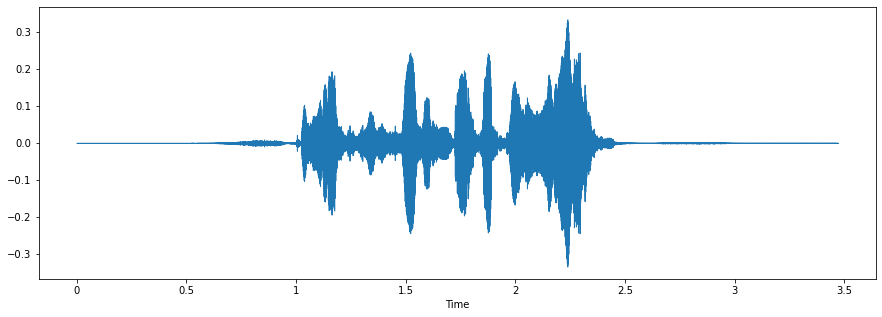

In [11]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

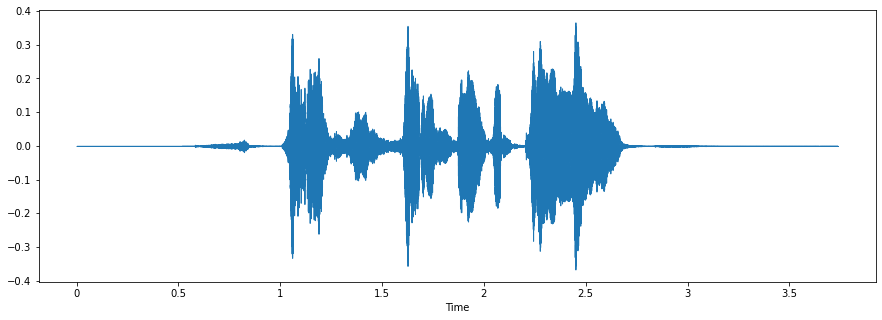

In [12]:

fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [13]:
dir_list=os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [14]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

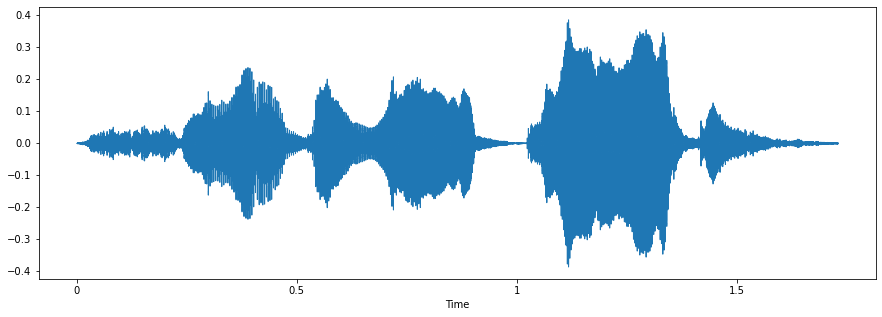

In [15]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

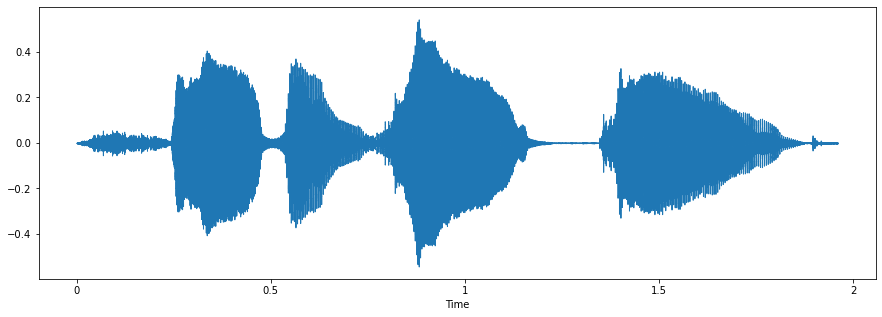

In [16]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [17]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])
len(dir_list)

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


7442

In [18]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

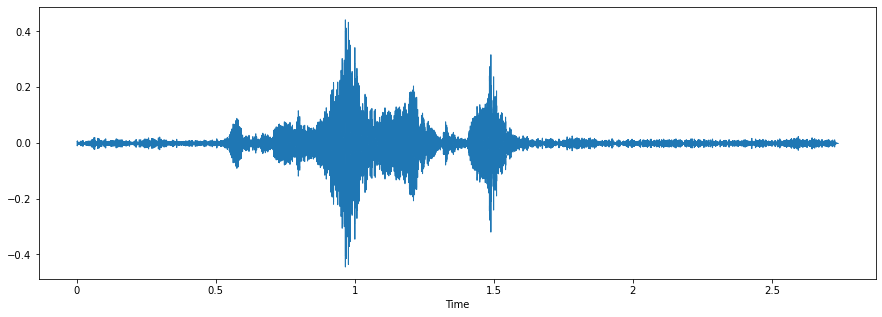

In [19]:
# use the well known Librosa library for this task 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

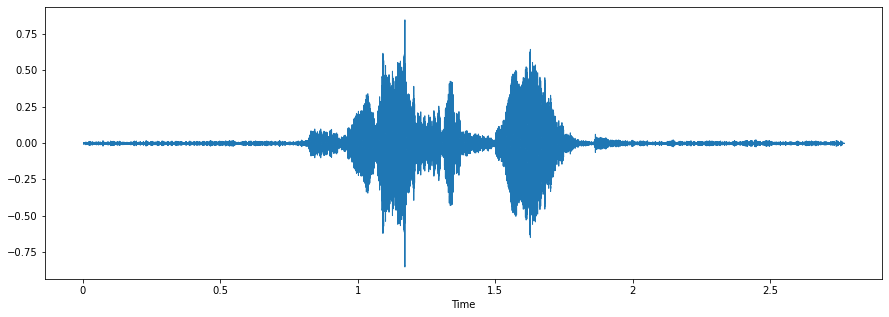

In [20]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [21]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


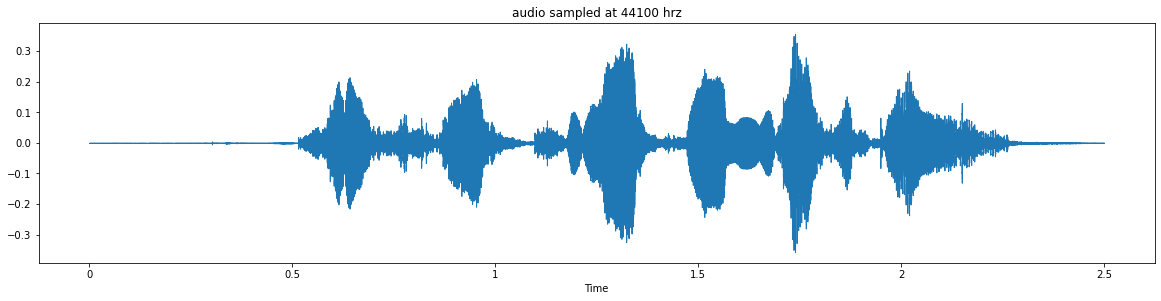

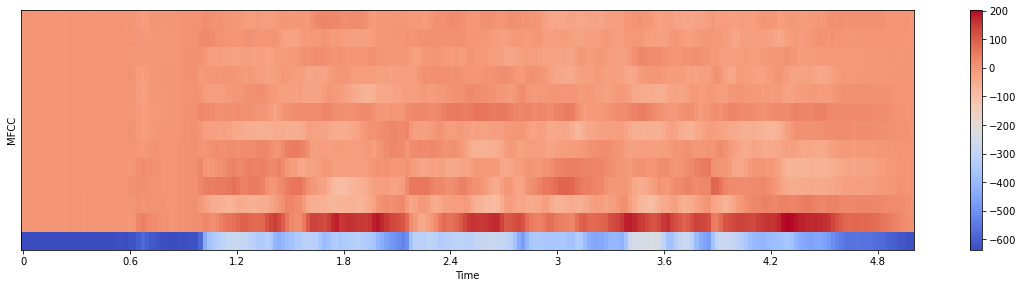

In [23]:
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X,sample_rate=librosa.load(path,res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc=librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13)

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(X,sr=sample_rate)
plt.title("audio sampled at 44100 hrz")

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc,x_axis='time')
plt.ylabel("MFCC")
plt.colorbar()
ipd.Audio(path)

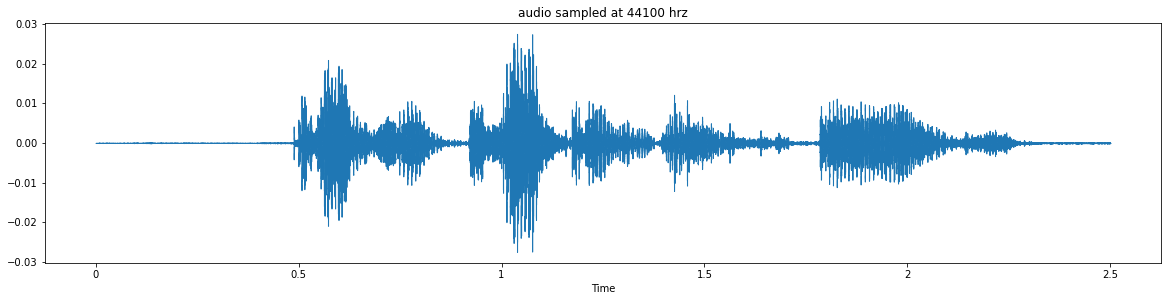

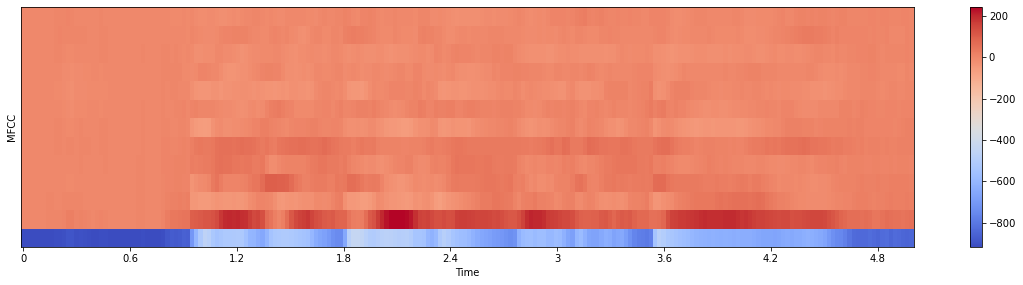

In [24]:
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X,sample_rate=librosa.load(path,res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc=librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13)

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(X,sr=sample_rate)
plt.title("audio sampled at 44100 hrz")

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc,x_axis='time')
plt.ylabel("MFCC")
plt.colorbar()
ipd.Audio(path)

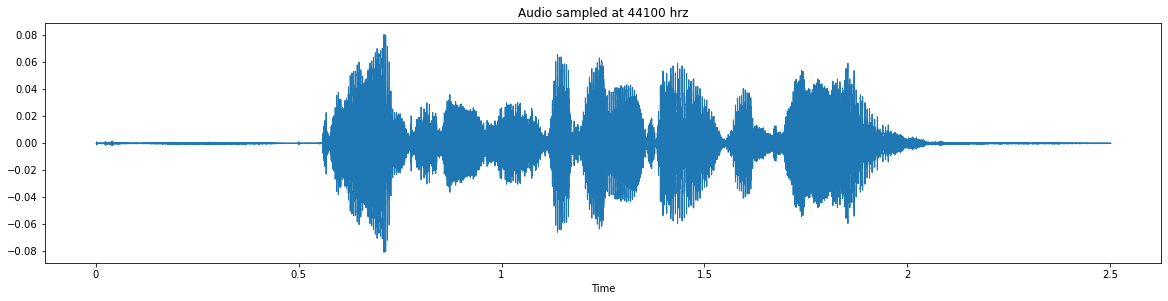

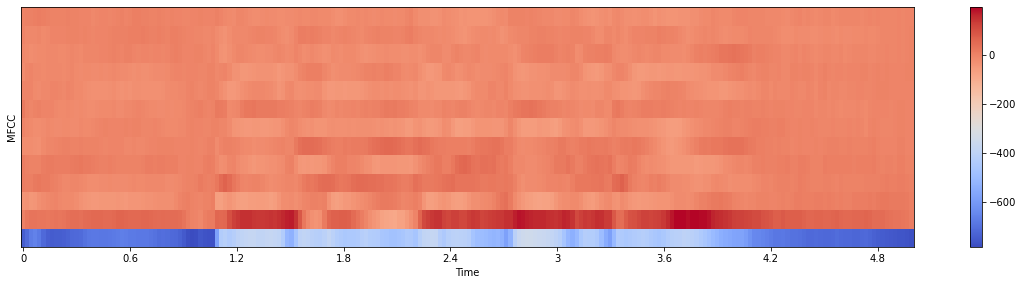

In [25]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

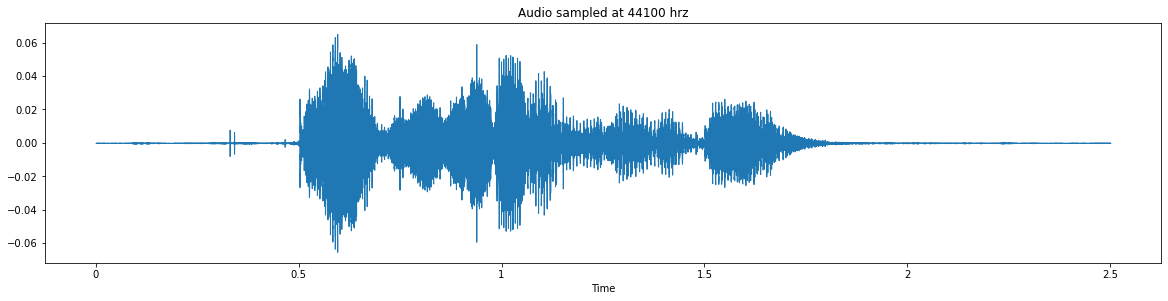

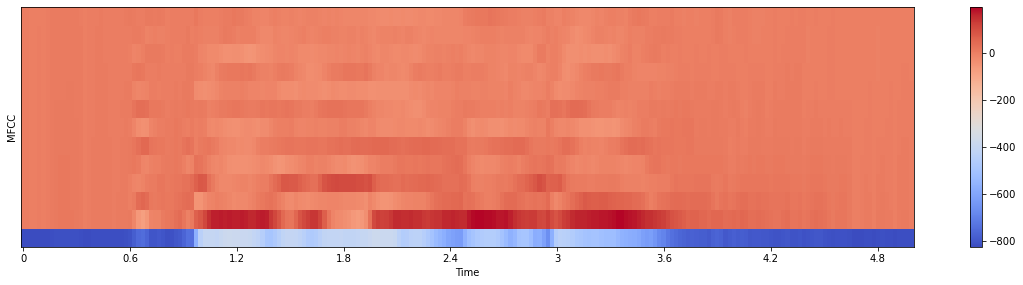

In [26]:
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

In [27]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X,sample_rate=librosa.load(path,res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female=librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13)

female=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
print(len(female))

216


In [28]:
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))


216


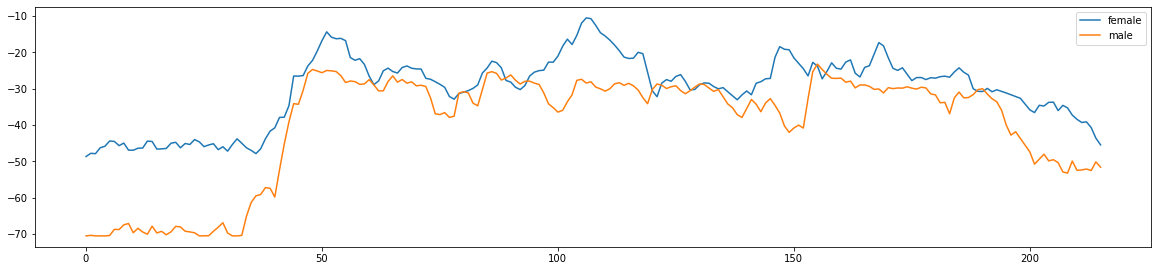

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(female,label='female')
plt.plot(male,label='male')
plt.legend()

216
216


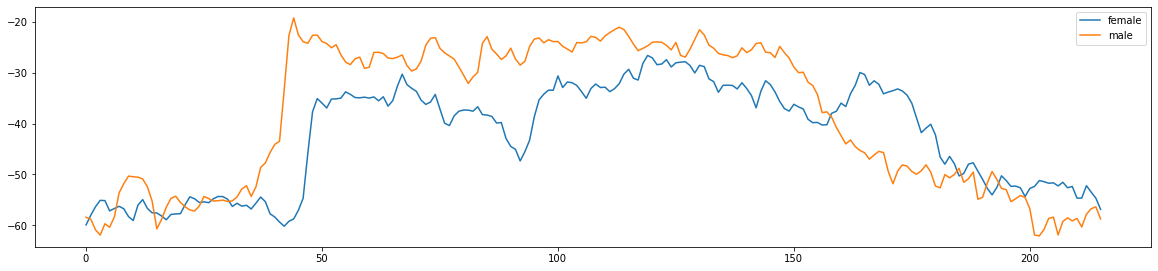

In [31]:
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/home/nikhil/Desktop/audio/dataset/RAVDESS/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [32]:
import tensorflow.keras as keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#other
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  

In [15]:
ref=df

In [16]:
ref.head()

labels source                                               path
0  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
1  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
2  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
3  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
4  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...

In [17]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

12162


feature
0  [-4.6414213, -3.860898, -6.2191906, -5.9265423...
1  [-8.690716, -12.522837, -22.928043, -23.243807...
2  [-8.814863, -12.819055, -24.178183, -23.84745,...
3  [-2.2684252, -4.3170776, -12.285237, -13.08302...
4  [-13.485307, -16.26042, -25.884357, -27.827044...

In [18]:
ref

labels source                                               path
0         male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
1         male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
2         male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
3         male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
4         male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...
...              ...    ...                                                ...
7437  female_disgust  CREMA  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...
7438     female_fear  CREMA  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...
7439    female_happy  CREMA  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...
7440  female_neutral  CREMA  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...
7441      female_sad  CREMA  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...

[12162 rows x 3 columns]

In [19]:
df.reset_index(inplace = True)

In [20]:
df

index                                            feature
0          0  [-4.6414213, -3.860898, -6.2191906, -5.9265423...
1          1  [-8.690716, -12.522837, -22.928043, -23.243807...
2          2  [-8.814863, -12.819055, -24.178183, -23.84745,...
3          3  [-2.2684252, -4.3170776, -12.285237, -13.08302...
4          4  [-13.485307, -16.26042, -25.884357, -27.827044...
...      ...                                                ...
12157  12157  [-20.27086, -15.97932, -16.981724, -16.507805,...
12158  12158  [-21.931162, -18.9715, -19.228441, -20.90208, ...
12159  12159  [-21.730156, -19.989624, -19.352476, -20.54941...
12160  12160  [-24.583866, -21.026398, -21.9294, -22.72151, ...
12161  12161  [-17.737305, -16.649336, -16.614231, -17.75939...

[12162 rows x 2 columns]

In [21]:
ref.reset_index(inplace = True)

In [22]:
ref

index          labels source  \
0          0      male_angry  SAVEE   
1          1      male_angry  SAVEE   
2          2      male_angry  SAVEE   
3          3      male_angry  SAVEE   
4          4      male_angry  SAVEE   
...      ...             ...    ...   
12157   7437  female_disgust  CREMA   
12158   7438     female_fear  CREMA   
12159   7439    female_happy  CREMA   
12160   7440  female_neutral  CREMA   
12161   7441      female_sad  CREMA   

                                                    path  
0      /home/nikhil/Desktop/audio/dataset/savee/ALL/D...  
1      /home/nikhil/Desktop/audio/dataset/savee/ALL/D...  
2      /home/nikhil/Desktop/audio/dataset/savee/ALL/D...  
3      /home/nikhil/Desktop/audio/dataset/savee/ALL/D...  
4      /home/nikhil/Desktop/audio/dataset/savee/ALL/D...  
...                                                  ...  
12157  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...  
12158  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...  
12159  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...  
12160  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...  
12161  /home/nikhil/Desktop/audio/dataset/CREMAD/Audi...  

[12162 rows x 4 columns]

In [23]:
df2=pd.DataFrame(df['feature'].values.tolist())

In [24]:
df2.reset_index(inplace = True)

In [25]:
df2

index          0          1          2          3          4  \
0          0  -4.641421  -3.860898  -6.219191  -5.926542  -5.850419   
1          1  -8.690716 -12.522837 -22.928043 -23.243807 -22.926605   
2          2  -8.814863 -12.819055 -24.178183 -23.847450 -15.182783   
3          3  -2.268425  -4.317078 -12.285237 -13.083024 -12.041327   
4          4 -13.485307 -16.260420 -25.884357 -27.827044 -27.593534   
...      ...        ...        ...        ...        ...        ...   
12157  12157 -20.270861 -15.979320 -16.981724 -16.507805 -16.262648   
12158  12158 -21.931162 -18.971500 -19.228441 -20.902081 -20.060429   
12159  12159 -21.730156 -19.989624 -19.352476 -20.549416 -19.826164   
12160  12160 -24.583866 -21.026398 -21.929399 -22.721510 -21.201597   
12161  12161 -17.737305 -16.649336 -16.614231 -17.759392 -16.887169   

               5          6          7          8  ...        206        207  \
0      -4.808960  -2.513002  -3.500537  -3.721045  ...  -4.088851  -5.023864   
1     -23.432240 -14.830004  -8.285514  -4.114430  ... -22.627258 -22.633406   
2     -10.732485  -8.681472  -8.655434  -7.889995  ...        NaN        NaN   
3     -11.819768  -9.414148  -8.153646 -11.953334  ...        NaN        NaN   
4     -26.666512 -18.659025 -11.698080 -10.721752  ... -25.291666 -25.854906   
...          ...        ...        ...        ...  ...        ...        ...   
12157 -16.896891 -16.555403 -15.997498 -14.659115  ...        NaN        NaN   
12158 -19.458862 -22.619347 -22.565613 -22.109285  ...        NaN        NaN   
12159 -18.723145 -18.076763 -20.378277 -20.103228  ...        NaN        NaN   
12160 -18.587864 -16.677309 -17.974516 -17.923595  ...        NaN        NaN   
12161 -17.228888 -17.364506 -18.352634 -17.101326  ...        NaN        NaN   

             208        209        210        211        212        213  \
0      -5.254715  -5.234093  -5.310308  -5.621666  -6.072196  -6.611347   
1     -22.511597 -24.300154 -24.496809 -22.895985 -23.511503 -24.342152   
2            NaN        NaN        NaN        NaN        NaN        NaN   
3            NaN        NaN        NaN        NaN        NaN        NaN   
4     -26.821354 -25.436455 -24.179941 -23.281618 -24.167494 -25.228062   
...          ...        ...        ...        ...        ...        ...   
12157        NaN        NaN        NaN        NaN        NaN        NaN   
12158        NaN        NaN        NaN        NaN        NaN        NaN   
12159        NaN        NaN        NaN        NaN        NaN        NaN   
12160        NaN        NaN        NaN        NaN        NaN        NaN   
12161        NaN        NaN        NaN        NaN        NaN        NaN   

             214        215  
0      -3.999875   1.390505  
1     -16.465858  -8.936035  
2            NaN        NaN  
3            NaN        NaN  
4     -20.599659 -15.929615  
...          ...        ...  
12157        NaN        NaN  
12158        NaN        NaN  
12159        NaN        NaN  
12160        NaN        NaN  
12161        NaN        NaN  

[12162 rows x 217 columns]

In [26]:
df = pd.concat([ref,df2],axis=1)


In [27]:
df.drop('index',inplace=True,axis=1)

In [28]:
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
1  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
2  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
3  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
4  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   

           0          1          2          3          4          5  \
0  -4.641421  -3.860898  -6.219191  -5.926542  -5.850419  -4.808960   
1  -8.690716 -12.522837 -22.928043 -23.243807 -22.926605 -23.432240   
2  -8.814863 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485   
3  -2.268425  -4.317078 -12.285237 -13.083024 -12.041327 -11.819768   
4 -13.485307 -16.260420 -25.884357 -27.827044 -27.593534 -26.666512   

           6  ...        206        207        208        209        210  \
0  -2.513002  ...  -4.088851  -5.023864  -5.254715  -5.234093  -5.310308   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...        NaN        NaN        NaN        NaN        NaN   
3  -9.414148  ...        NaN        NaN        NaN        NaN        NaN   
4 -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621666  -6.072196  -6.611347  -3.999875   1.390505  
1 -22.895985 -23.511503 -24.342152 -16.465858  -8.936035  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4 -23.281618 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

In [29]:
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


labels source                                               path  \
0  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
1  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
2  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
3  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   
4  male_angry  SAVEE  /home/nikhil/Desktop/audio/dataset/savee/ALL/D...   

           0          1          2          3          4          5  \
0  -4.641421  -3.860898  -6.219191  -5.926542  -5.850419  -4.808960   
1  -8.690716 -12.522837 -22.928043 -23.243807 -22.926605 -23.432240   
2  -8.814863 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485   
3  -2.268425  -4.317078 -12.285237 -13.083024 -12.041327 -11.819768   
4 -13.485307 -16.260420 -25.884357 -27.827044 -27.593534 -26.666512   

           6  ...        206        207        208        209        210  \
0  -2.513002  ...  -4.088851  -5.023864  -5.254715  -5.234093  -5.310308   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   
2  -8.681472  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
3  -9.414148  ...   0.000000   0.000000   0.000000   0.000000   0.000000   
4 -18.659025  ... -25.291666 -25.854906 -26.821354 -25.436455 -24.179941   

         211        212        213        214        215  
0  -5.621666  -6.072196  -6.611347  -3.999875   1.390505  
1 -22.895985 -23.511503 -24.342152 -16.465858  -8.936035  
2   0.000000   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000   0.000000  
4 -23.281618 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

In [30]:
df.to_csv('main-df.csv',encoding='utf-8',index=False)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['path','labels','source'],axis=1),df.labels,test_size=0.25,shuffle=True,random_state=42)
X_train[150:160]

0          1          2          3          4          5    \
4950  -17.178810 -17.293514 -18.411484 -18.987421 -17.404621 -16.747271   
3860  -13.317886 -16.820253 -23.087040 -22.467028 -20.362326 -19.076139   
9761   -4.828484  -6.076793  -9.614023 -12.045175  -9.992991 -11.926252   
7620   -7.050759  -4.283337  -4.567834  -5.871509  -5.282473  -6.490458   
11586 -22.590061 -21.799612 -20.563650 -20.703459 -21.205717 -18.608528   
7914  -20.099590 -19.013206 -17.043013 -16.977903 -19.369631 -19.562130   
9513  -20.122581 -18.657488 -16.149492 -16.963455 -18.229979 -18.183958   
5835  -21.096134 -18.702654 -17.710285 -18.043194 -18.252481 -18.710625   
5389  -22.736338 -20.195595 -18.961346 -19.468687 -19.316296 -18.162565   
11222 -20.042538 -17.674582 -19.222475 -18.469973 -17.572329 -17.850544   

             6          7          8          9    ...        206        207  \
4950  -17.733749 -18.055027 -17.931210 -15.913168  ... -22.899403 -21.647814   
3860  -19.761509 -13.231027 -11.808992 -16.756002  ...   0.000000   0.000000   
9761  -14.008464 -13.561556 -14.024567 -15.151946  ...   0.000000   0.000000   
7620   -8.156469  -9.188803  -8.681726  -8.212409  ...   0.000000   0.000000   
11586 -18.446669 -16.211843 -14.257653 -15.160404  ...   0.000000   0.000000   
7914  -22.008749 -20.178379 -17.989597 -19.336285  ...   0.000000   0.000000   
9513  -19.274342 -18.395124 -16.951290 -16.672031  ... -17.882132 -19.390713   
5835  -16.626354 -17.831005 -18.028345 -17.859104  ...   0.000000   0.000000   
5389  -18.102333 -19.914131 -20.931385 -19.215496  ...   0.000000   0.000000   
11222 -17.932026 -20.588900 -18.612183 -15.990725  ... -18.065437 -18.135094   

             208        209        210        211        212        213  \
4950  -19.758656 -18.879402 -19.397377 -20.171659 -22.689241 -24.612816   
3860    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9761    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7620    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11586   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7914    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9513  -17.779472 -19.165937   0.000000   0.000000   0.000000   0.000000   
5835    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5389    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11222 -19.665306 -20.741903 -20.273037 -18.371035 -15.576725 -17.512487   

             214        215  
4950  -24.073122 -23.239702  
3860    0.000000   0.000000  
9761    0.000000   0.000000  
7620    0.000000   0.000000  
11586   0.000000   0.000000  
7914    0.000000   0.000000  
9513    0.000000   0.000000  
5835    0.000000   0.000000  
5389    0.000000   0.000000  
11222 -17.050734 -19.143282  

[10 rows x 216 columns]

In [ ]:
mean=np.mean(X_train,axis=0)
std=np.std(X_train,axis=0)
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [ ]:
X_train[150:160]

0         1         2         3         4         5         6    \
4950   0.371092  0.349779  0.437225  0.387954  0.499050  0.543698  0.462640   
3860   0.649367  0.384727  0.090003  0.130081  0.280174  0.371309  0.312801   
9761   1.261238  1.178079  1.090555  0.902442  1.047526  0.900562  0.737915   
7620   1.101068  1.310517  1.465302  1.359971  1.396114  1.302934  1.170341   
11586 -0.018923  0.017025  0.277398  0.260778  0.217761  0.405923  0.409959   
7914   0.160577  0.222788  0.538853  0.536878  0.353635  0.335335  0.146744   
9513   0.158920  0.249056  0.605209  0.537949  0.437972  0.437351  0.348799   
5835   0.088752  0.245720  0.489299  0.457930  0.436306  0.398366  0.544469   
5389  -0.029466  0.135474  0.396391  0.352287  0.357582  0.438935  0.435404   
11222  0.164689  0.321639  0.376999  0.426302  0.486639  0.462031  0.447988   

            7         8         9    ...       206       207       208  \
4950   0.433207  0.435874  0.580961  ... -0.883238 -0.815446 -0.695031   
3860   0.789026  0.886970  0.518881  ...  0.540185  0.526218  0.525755   
9761   0.764647  0.723722  0.637031  ...  0.540185  0.526218  0.525755   
7620   1.087182  1.117393  1.148174  ...  0.540185  0.526218  0.525755   
11586  0.569161  0.706548  0.636408  ...  0.540185  0.526218  0.525755   
7914   0.276588  0.431572  0.328826  ...  0.540185  0.526218  0.525755   
9513   0.408121  0.508076  0.525066  ... -0.571365 -0.675557 -0.572748   
5835   0.449731  0.428717  0.437630  ...  0.540185  0.526218  0.525755   
5389   0.296079  0.214816  0.337723  ...  0.540185  0.526218  0.525755   
11222  0.246308  0.385699  0.575249  ... -0.582759 -0.597738 -0.689264   

            209       210       211       212       213       214       215  
4950  -0.633081 -0.679814 -0.722825 -0.865524 -0.989207 -0.975158 -0.920808  
3860   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
9761   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
7620   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
11586  0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
7914   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
9513  -0.650682  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
5835   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
5389   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
11222 -0.747492 -0.733608 -0.612591 -0.433410 -0.559199 -0.546326 -0.672428  

[10 rows x 216 columns]

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
lb=LabelEncoder()
y_train=keras.utils.to_categorical(lb.fit_transform(y_train))
y_test=keras.utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
print(X_train.shape)

(9121, 216)


In [ ]:
print(lb.classes_)

['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [ ]:
X_train

array([[[ 1.0397227 ],
        [ 0.94007802],
        [ 0.88895564],
        ...,
        [ 0.50138775],
        [ 0.49490318],
        [ 0.48829434]],

       [[-0.06507865],
        [ 0.01532064],
        [ 0.10070193],
        ...,
        [-0.7928202 ],
        [-0.80503058],
        [-0.83622967]],

       [[ 0.49722187],
        [ 0.19434388],
        [-0.19935112],
        ...,
        [ 0.50138775],
        [ 0.49490318],
        [ 0.48829434]],

       ...,

       [[ 0.16904473],
        [ 0.28927316],
        [ 0.48139017],
        ...,
        [ 0.50138775],
        [ 0.49490318],
        [ 0.48829434]],

       [[-3.52165113],
        [-3.63011282],
        [-3.4821841 ],
        ...,
        [-3.14414419],
        [-2.96134797],
        [-3.10156251]],

       [[ 0.06437054],
        [ 0.49729335],
        [ 0.7326124 ],
        ...,
        [ 0.50138775],
        [ 0.49490318],
        [ 0.48829434]]])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
!pip install keras

     |████████████████████████████████| 1.6 MB 151 kB/s eta 0:00:01


In [ ]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt= tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)           0

In [45]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
571/571 [==============================] - 12s 18ms/step - loss: 1.7430 - accuracy: 0.4005 - val_loss: 1.8806 - val_accuracy: 0.3995
Epoch 2/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7172 - accuracy: 0.4133 - val_loss: 1.8204 - val_accuracy: 0.3930
Epoch 3/100
571/571 [==============================] - 10s 17ms/step - loss: 1.7256 - accuracy: 0.4075 - val_loss: 1.8270 - val_accuracy: 0.3910
Epoch 4/100
571/571 [==============================] - 10s 18ms/step - loss: 1.6602 - accuracy: 0.4338 - val_loss: 1.8029 - val_accuracy: 0.4143
Epoch 5/100
571/571 [==============================] - 10s 18ms/step - loss: 1.6452 - accuracy: 0.4382 - val_loss: 1.7888 - val_accuracy: 0.4041
Epoch 6/100
571/571 [==============================] - 10s 18ms/step - loss: 1.6564 - accuracy: 0.4359 - val_loss: 1.7853 - val_accuracy: 0.4097
Epoch 7/100
571/571 [==============================] - 11s 19ms/step - loss: 1.6159 - accuracy: 0.4458 - val_loss: 1.7739 - val_ac

Virtual devices cannot be modified after being initialized


In [47]:
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /home/nikhil/Desktop/audio/saved_models/Emotion_Model.h5 


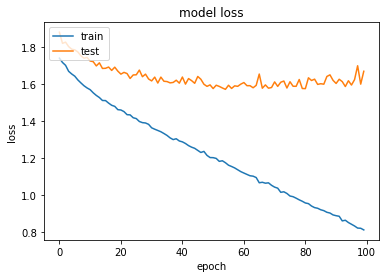

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt =  tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 47.02%


In [49]:
preds = loaded_model.predict(X_test, batch_size=16, verbose=1)
preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 1s 5ms/step


array([2, 3, 0, ..., 2, 4, 0])

In [50]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170        male_sad      female_sad
171  female_neutral  female_neutral
172      male_angry    female_angry
173  female_disgust  female_disgust
174      male_angry      male_angry
175     female_fear     female_fear
176    male_neutral    male_neutral
177     female_fear     female_fear
178    female_happy     female_fear
179  female_neutral  female_neutral

In [51]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              525
female_disgust            325
female_fear               387
female_happy              354
female_neutral            238
female_sad                509
female_surprise           113
male_angry                152
male_disgust               62
male_fear                  39
male_happy                176
male_neutral               73
male_sad                   49
male_surprise              39

In [52]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4702400526142716


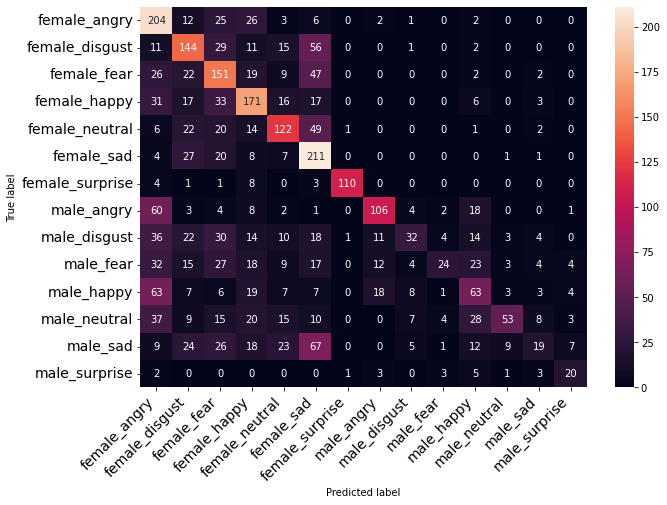

In [53]:
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [54]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.39      0.73      0.51       281
 female_disgust       0.44      0.54      0.48       269
    female_fear       0.39      0.54      0.45       278
   female_happy       0.48      0.58      0.53       294
 female_neutral       0.51      0.51      0.51       237
     female_sad       0.41      0.76      0.54       279
female_surprise       0.97      0.87      0.92       127
     male_angry       0.70      0.51      0.59       209
   male_disgust       0.52      0.16      0.25       199
      male_fear       0.62      0.12      0.21       192
     male_happy       0.36      0.30      0.33       209
   male_neutral       0.73      0.25      0.38       209
       male_sad       0.39      0.09      0.14       220
  male_surprise       0.51      0.53      0.52        38

       accuracy                           0.47      3041
      macro avg       0.53      0.46      0.45      3041
   weighted avg       0.51   

0.75731667214732


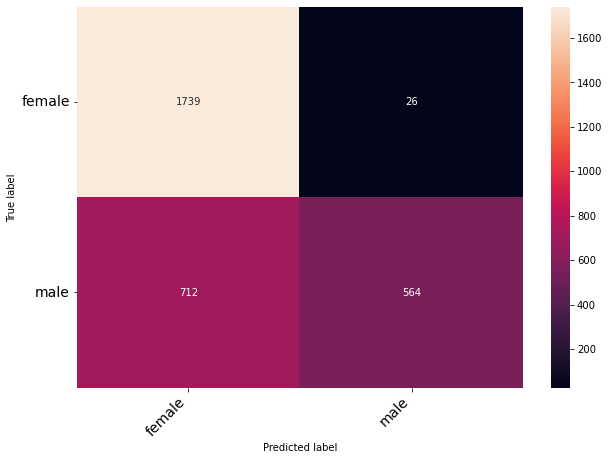

In [55]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [56]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.71      0.99      0.82      1765
        male       0.96      0.44      0.60      1276

    accuracy                           0.76      3041
   macro avg       0.83      0.71      0.71      3041
weighted avg       0.81      0.76      0.73      3041



0.5429135152910227


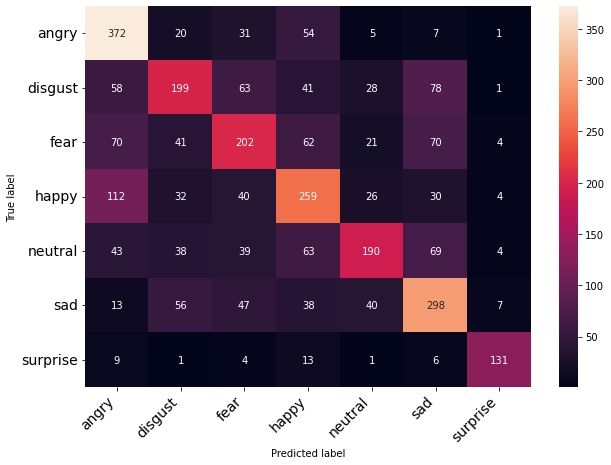

In [57]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [58]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.55      0.76      0.64       490
     disgust       0.51      0.43      0.47       468
        fear       0.47      0.43      0.45       470
       happy       0.49      0.51      0.50       503
     neutral       0.61      0.43      0.50       446
         sad       0.53      0.60      0.56       499
    surprise       0.86      0.79      0.83       165

    accuracy                           0.54      3041
   macro avg       0.58      0.56      0.56      3041
weighted avg       0.55      0.54      0.54      3041



In [1]:
# Importing required libraries 
from tensorflow.keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import tensorflow.keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [39]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
import wave
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [40]:
import pyaudio

In [41]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 
CHANNELS = 2 
RATE = 44100 
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "testing.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [42]:
data, sampling_rate = librosa.load('/home/nikhil/Desktop/audio/testing.wav')
ipd.Audio('/home/nikhil/Desktop/audio/testing.wav')

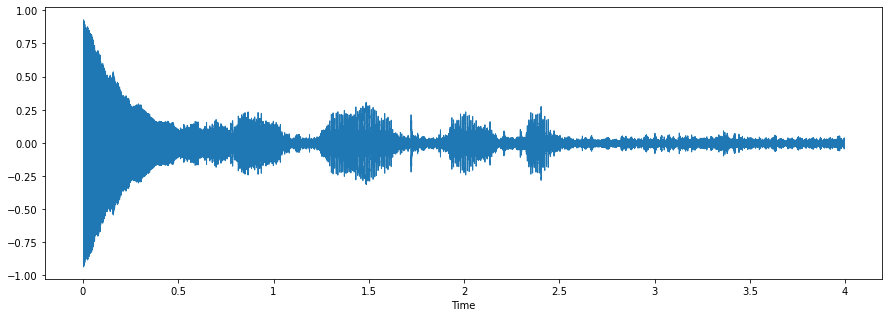

In [43]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [45]:
json_file = open('/home/nikhil/Desktop/audio/model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/home/nikhil/Desktop/audio/saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# the optimiser
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [46]:
X, sample_rate = librosa.load('/home/nikhil/Desktop/audio/testing.wav'
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0         1         2         3         4         5         6    \
0 -3.479608 -5.753975 -7.018254 -6.230813 -4.640418 -2.725212 -1.308071   

        7         8         9    ...        206        207       208      209  \
0 -1.584037 -1.839964 -1.714299  ... -10.377872 -10.352395 -8.773436 -9.15482   

        210       211       212       213       214      215  
0 -8.161512 -6.416013 -8.086511 -9.865536 -8.397531 -4.42539  

[1 rows x 216 columns]

In [47]:
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, batch_size=16, verbose=1)
newpred

1/1 [==============================] - 3s 3s/step


array([[2.6920164e-09, 9.7027490e-11, 8.9952372e-11, 6.1094187e-07,
        2.2461139e-12, 2.8538906e-07, 2.8751418e-01, 2.4382246e-06,
        1.0091627e-03, 3.3912115e-04, 6.6874045e-01, 1.2939746e-04,
        2.6703313e-07, 4.2264041e-02]], dtype=float32)

In [48]:
filename = '/home/nikhil/Desktop/audio/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) 
# gender(final) 

['male_happy']
